# Tech-Moms Application Data
This notebook performs data preprocessing and feature engineering to prepare the Tech-Moms application dataset for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn's whitegrid style for cleaner visualizations
sns.set_palette("viridis")  # Use viridis color palette for better accessibility and aesthetics
plt.rcParams['figure.figsize'] = (14, 8)  # Set default figure size for better readability

# 1. Load and Prepare the Data

In [3]:
print("1. Loading and Preparing the Data")
print("---------------------------------")

# Load the cleaned data from the EDA notebook
df = pd.read_csv('tech_moms_eda_cleaned.csv')

print("Successfully loaded cleaned data from the EDA notebook")

1. Loading and Preparing the Data
---------------------------------
Successfully loaded cleaned data from the EDA notebook


In [4]:
# Convert 'create_date' to datetime format
df['create_date'] = pd.to_datetime(df['create_date'], errors='coerce')

In [5]:
# Extract date components for time-based analysis
df['year'] = df['create_date'].dt.year
df['month'] = df['create_date'].dt.month
df['day'] = df['create_date'].dt.day
df['weekday'] = df['create_date'].dt.weekday

In [6]:
# Replace empty strings with NaN for consistency in missing value handling
df = df.replace('', np.nan)

In [7]:
# Display the first few rows of the prepared data
print("\nFirst few rows of the prepared dataset:")
df.head()


First few rows of the prepared dataset:


,contact_id,cohort,applicant_status,children,computer_availability,employment_status,salary_range,relationship_and_marital_status,household_income,education_level,lgbtqi_identity,veteran_status,race_ethnicity,create_date,year,ethnicity_simplified,month,weekday,day
0,1,Dead Lead,Declined Attending,3.0,I do not own a laptop,NaN,NaN,Married,$50k - $75k,Bachelor's Degree,NaN,NaN,White,2020-11-25 09:20:00,2020,White,11,2,25
1,2,Dead Lead,Dead lead,2.0,Laptop (Mac),Employed full-time (35 hrs+),$25K-$35K,Single,$25k - $35k,Bachelor's Degree,NaN,NaN,White,2020-11-25 09:20:00,2020,White,11,2,25
2,3,Dead Lead,Declined Attending,3.0,Laptop (PC),Employed almost full-time (up to 35 hrs),$15K-$25K,Married,$100k - $150k,Bachelor's Degree,NaN,NaN,White,2020-11-25 09:20:00,2020,White,11,2,25
3,4,2020 Fall - Lehi,Assigned Cohort,1.0,Laptop (PC),Employed full-time (35 hrs+),$25K-$35K,Married,$50k - $75k,Associates Degree,NaN,NaN,Hispanic or Latina,2020-11-25 09:20:00,2020,Hispanic or Latina,11,2,25
4,5,Dead Lead,Dead lead,NaN,Laptop (PC),NaN,NaN,Domestic Partnership,<$15k,Bachelor's Degree,NaN,NaN,White,2020-11-25 09:20:00,2020,White,11,2,25


# 2. Data Cleaning and Handling Missing Values

In [8]:
print("\n2. Data Cleaning and Handling Missing Values")
print("--------------------------------------------")

# Check for missing values to determine handling strategy
print("\nMissing values in each column:")
missing_values = df.isnull().sum()  # Count nulls in each column
missing_percent = (df.isnull().sum() / len(df)) * 100  # Calculate percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df.sort_values(by='Missing Values', ascending=False)  # Sort by most missing
print(missing_df)


2. Data Cleaning and Handling Missing Values
--------------------------------------------

Missing values in each column:
                                 Missing Values  Percentage
veteran_status                             1708   98.614319
lgbtqi_identity                            1636   94.457275
computer_availability                       106    6.120092
employment_status                            70    4.041570
race_ethnicity                               50    2.886836
salary_range                                 43    2.482679
children                                     28    1.616628
cohort                                        3    0.173210
applicant_status                              3    0.173210
contact_id                                    0    0.000000
relationship_and_marital_status               0    0.000000
education_level                               0    0.000000
household_income                              0    0.000000
create_date                          

In [9]:
# Handle missing values - different strategy for each column based on its nature and importance

In [10]:
# For veteran_status and lgbtqi_identity: These have very high missing values (>90%)
# Since these are demographic fields that were likely optional, we'll create a "Not Specified" category
df['veteran_status'] = df['veteran_status'].fillna('Not Specified')
df['lgbtqi_identity'] = df['lgbtqi_identity'].fillna('Not Specified')

In [11]:
# For computer_availability: Important for program participation, create a separate category
df['computer_availability'] = df['computer_availability'].fillna('Not Specified')

In [12]:
# For employment_status: Important for program qualification, create "Not Specified" category
df['employment_status'] = df['employment_status'].fillna('Not Specified')

In [13]:
# For children: We'll impute with the median number of children (less biased than mean)
median_children = df['children'].median()
df['children'] = df['children'].fillna(median_children)
print(f"\nImputed missing 'children' values with median: {median_children}")


Imputed missing 'children' values with median: 2.0


In [14]:
# For salary_range: Create a "Not Specified" category for missing values
df['salary_range'] = df['salary_range'].fillna('Not Specified')

In [15]:
# For race_ethnicity: Create a "Not Specified" category
df['race_ethnicity'] = df['race_ethnicity'].fillna('Not Specified')

In [16]:
# Handling missing values in cohort and applicant_status (very few missing)
# For cohort: Fill with "Unknown"
df['cohort'] = df['cohort'].fillna('Unknown')

In [17]:
# For applicant_status: Fill with "Unknown"
df['applicant_status'] = df['applicant_status'].fillna('Unknown')

In [18]:
# Check remaining missing values after handling
print("\nRemaining missing values after handling:")
print(df.isnull().sum())  # Should show zeros or very few remaining missing values


Remaining missing values after handling:
contact_id                         0
cohort                             0
applicant_status                   0
children                           0
computer_availability              0
employment_status                  0
salary_range                       0
relationship_and_marital_status    0
household_income                   0
education_level                    0
lgbtqi_identity                    0
veteran_status                     0
race_ethnicity                     0
create_date                        0
year                               0
ethnicity_simplified               0
month                              0
weekday                            0
day                                0
dtype: int64


# 3. Feature Engineering

In [19]:
# Creating new features that might be predictive of program outcomes
print("\n3. Feature Engineering")
print("---------------------")


3. Feature Engineering
---------------------


In [20]:
# Encode binary indicator for computer ownership
# This simplifies the computer availability into a yes/no feature
df['has_computer'] = df['computer_availability'].apply(
    lambda x: 0 if x == 'I do not own a laptop' or x == 'Not Specified' else 1)

In [21]:
# Create a feature for the number of children categories
# Grouping children into meaningful categories for analysis
df['children_category'] = pd.cut(
    df['children'],
    bins=[-1, 0, 1, 3, float('inf')],  # Define bin boundaries
    labels=['No Children', 'One Child', '2-3 Children', '4+ Children']  # Labels for each bin
)

In [22]:
# Simplify employment status - group similar statuses together
def simplify_employment(status):
    """
    Function to categorize employment status into broader groups
    """
    if pd.isna(status) or status == 'Not Specified':
        return 'Not Specified'
    elif 'full-time' in str(status).lower():
        return 'Full-time'
    elif 'part-time' in str(status).lower() or 'almost full' in str(status).lower():
        return 'Part-time'
    elif 'not employed' in str(status).lower():
        return 'Not Employed'
    else:
        return 'Other'

In [23]:
df['employment_simplified'] = df['employment_status'].apply(simplify_employment)

In [24]:
# Create a feature for education level category
# Grouping education levels into broader categories
def categorize_education(edu):
    """
    Function to group education levels into broader categories
    """
    if pd.isna(edu):
        return 'Not Specified'
    elif 'High School' in edu:
        return 'High School'
    elif 'Some College' in edu or 'Certificate' in edu or 'Associates' in edu:
        return 'Some College'
    elif 'Bachelor' in edu:
        return 'Bachelor'
    elif 'Graduate' in edu or 'Doctoral' in edu or 'Professional' in edu:
        return 'Advanced Degree'
    else:
        return 'Other'

In [25]:
df['education_category'] = df['education_level'].apply(categorize_education)

In [26]:
# Make sure all missing values are consistently handled
df['household_income'] = df['household_income'].fillna('Missing')

In [27]:
# Create a feature for household income band
# Grouping income ranges into low, middle, and high categories
def income_band(income):
    if pd.isna(income) or income == '' or income == 'Missing':
        return 'Unknown'  # Using a completely different name to avoid conflicts
    elif any(x in income for x in ['0-25', '25-35', '35-50']):
        return 'Low'      # Shorter, simpler names
    elif any(x in income for x in ['50-75', '75-100']):
        return 'Medium'   # Shorter, simpler names
    elif any(x in income for x in ['100-150', '150+']):
        return 'High'     # Shorter, simpler names
    else:
        return 'Other'    # Simple catch-all

In [28]:
df['income_band'] = df['household_income'].apply(income_band)

In [29]:
# Simplify race/ethnicity
# Group race/ethnicity into fewer, more manageable categories
def simplify_race(race):
    """
    Function to standardize race/ethnicity categories
    """
    if pd.isna(race):
        return 'Not Specified'
    elif 'White' in race and not any(x in race for x in ['Hispanic', 'Asian', 'Black', 'Native', 'Pacific']):
        return 'White only'  # White, not multiracial
    elif 'Hispanic' in race or 'Latino' in race:
        return 'Hispanic/Latino'  # Any Hispanic/Latino identification
    elif 'Black' in race or 'African' in race:
        return 'Black/African American'
    elif 'Asian' in race:
        return 'Asian'
    elif 'Native' in race or 'Pacific' in race:
        return 'Native American/Pacific Islander'
    elif 'Other' in race:
        return 'Other'
    else:
        return 'Multiracial/Other'  # If multiple races indicated or doesn't fit above categories

In [30]:
df['race_simplified'] = df['race_ethnicity'].apply(simplify_race)

In [31]:
# Create a target variable for successful applications
# Binary indicator for whether applicant was accepted into program
df['accepted'] = df['applicant_status'].apply(
    lambda x: 1 if x == 'Assigned Cohort' else 0
)

In [32]:
# Encode time-based features for when application was submitted
# Quarter of the year (Q1-Q4)
df['quarter'] = (df['month'] - 1) // 3 + 1  # Calculate quarter from month

In [33]:
# Weekend vs Weekday indicator
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 5=Saturday, 6=Sunday

In [34]:
# Display sample of the engineered features
print("\nSample of engineered features:")
columns_to_show = ['contact_id', 'has_computer', 'children_category',
                  'employment_simplified', 'education_category',
                  'income_band', 'race_simplified', 'accepted',
                  'quarter', 'is_weekend']
df[columns_to_show].head(10)  # Show first 10 rows of selected columns


Sample of engineered features:


,contact_id,has_computer,children_category,employment_simplified,education_category,income_band,race_simplified,accepted,quarter,is_weekend
0,1,0,2-3 Children,Not Specified,Bachelor,Other,White only,0,4,0
1,2,1,2-3 Children,Full-time,Bachelor,Other,White only,0,4,0
2,3,1,2-3 Children,Full-time,Bachelor,Other,White only,0,4,0
3,4,1,One Child,Full-time,Some College,Other,Hispanic/Latino,1,4,0
4,5,1,2-3 Children,Not Specified,Bachelor,Other,White only,0,4,0
5,6,1,One Child,Full-time,High School,Other,White only,0,4,0
6,7,1,2-3 Children,Not Specified,Bachelor,Other,White only,0,4,0
7,8,1,2-3 Children,Part-time,Advanced Degree,Other,White only,0,4,0
8,9,1,4+ Children,Not Specified,High School,Other,White only,0,4,0
9,10,1,4+ Children,Full-time,Some College,Other,White only,0,4,0


# 4. Feature Exploration

In [35]:
# Examining the relationship between engineered features and acceptance
print("\n4. Feature Exploration")
print("---------------------")


4. Feature Exploration
---------------------


In [36]:
# Visualize relationship between new features and acceptance
print("\nRelationship between features and acceptance:")

# Computer ownership vs acceptance
# Calculate acceptance rate by computer ownership
computer_accept = pd.crosstab(df['has_computer'], df['accepted'], normalize='index') * 100
print("\nAcceptance Rate by Computer Ownership:")
print(computer_accept)


Relationship between features and acceptance:

Acceptance Rate by Computer Ownership:
accepted              0          1
has_computer                      
0             71.289538  28.710462
1             66.010598  33.989402


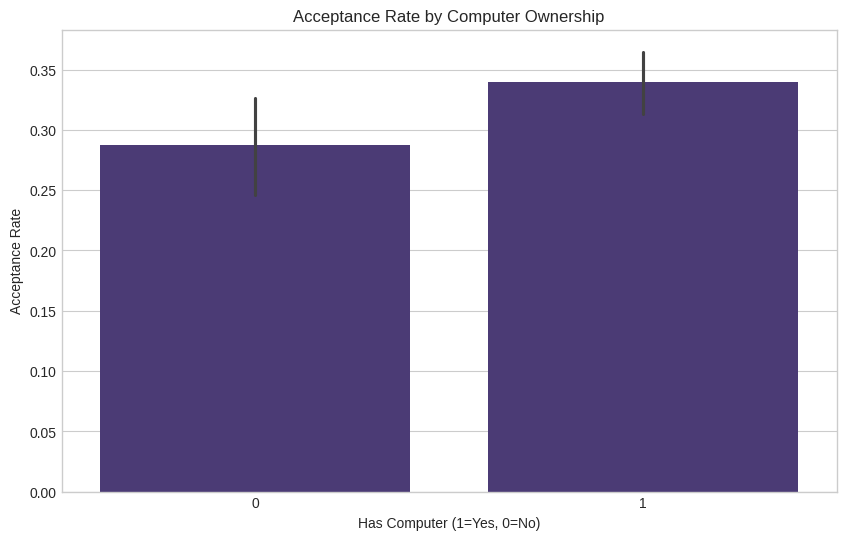

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['has_computer'].astype(str), y=df['accepted'])
plt.title('Acceptance Rate by Computer Ownership')
plt.xlabel('Has Computer (1=Yes, 0=No)')
plt.ylabel('Acceptance Rate')
plt.show()


Acceptance Rate by Education Category:
accepted                    0          1
education_category                      
Advanced Degree     64.593301  35.406699
Bachelor            62.570888  37.429112
High School         73.538462  26.461538
Some College        68.759342  31.240658


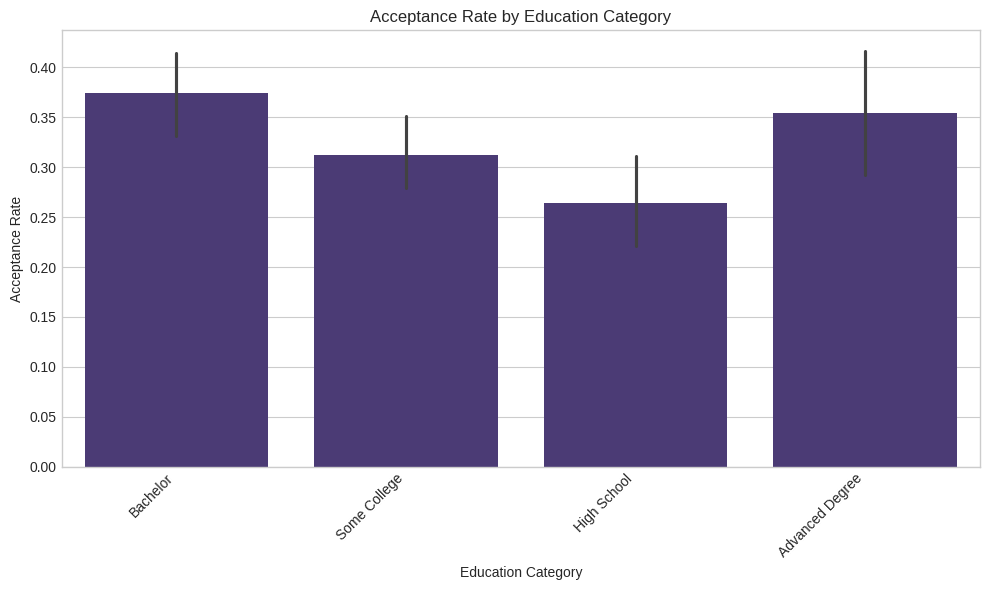

In [38]:
# Education category vs acceptance
# Calculate acceptance rate by education category
education_accept = pd.crosstab(df['education_category'], df['accepted'], normalize='index') * 100
print("\nAcceptance Rate by Education Category:")
print(education_accept)

plt.figure(figsize=(10, 6))
sns.barplot(x=df['education_category'], y=df['accepted'])
plt.title('Acceptance Rate by Education Category')
plt.xlabel('Education Category')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Acceptance Rate by Employment Status:
accepted                       0          1
employment_simplified                      
Full-time              62.827225  37.172775
Not Employed           72.204473  27.795527
Not Specified          67.142857  32.857143
Part-time              68.382353  31.617647


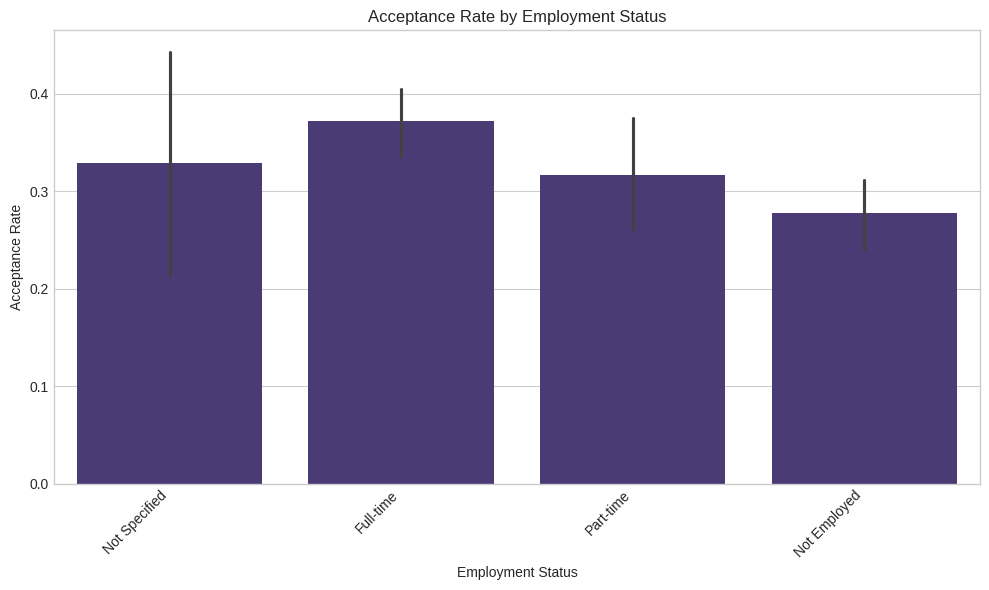

In [39]:
# Employment status vs acceptance
# Calculate acceptance rate by employment status
employment_accept = pd.crosstab(df['employment_simplified'], df['accepted'], normalize='index') * 100
print("\nAcceptance Rate by Employment Status:")
print(employment_accept)

plt.figure(figsize=(10, 6))
sns.barplot(x=df['employment_simplified'], y=df['accepted'])
plt.title('Acceptance Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. One-Hot Encoding Categorical Variables

In [40]:
# Converting categorical variables into a format usable by ML algorithms
print("\n5. One-Hot Encoding Categorical Variables")
print("----------------------------------------")



5. One-Hot Encoding Categorical Variables
----------------------------------------


In [41]:
# List of categorical columns to encode
categorical_columns = [
    'computer_availability',
    'employment_simplified',
    'education_category',
    'income_band',
    'race_simplified',
    'children_category',
    'ethnicity_simplified'  # Added ethnicity_simplified to be encoded
]

In [42]:
# One-hot encode the categorical variables
# This creates binary columns for each category (1 = belongs to category, 0 = doesn't)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [43]:
# Display the first few rows of the encoded data
print("\nFirst few rows of the encoded dataset:")
df_encoded.head()


First few rows of the encoded dataset:


,contact_id,cohort,applicant_status,children,employment_status,salary_range,relationship_and_marital_status,household_income,education_level,lgbtqi_identity,...,ethnicity_simplified_American Indian or Alaska Native,"ethnicity_simplified_American Indian or Alaska Native,White",ethnicity_simplified_Asian,ethnicity_simplified_Black or African American,ethnicity_simplified_Hispanic or Latina,"ethnicity_simplified_Hispanic or Latina,White",ethnicity_simplified_Native Hawaiian or Other Pacific Islander,ethnicity_simplified_Other,ethnicity_simplified_White,ethnicity_simplified_Would prefer not to answer
0,1,Dead Lead,Declined Attending,3.0,Not Specified,Not Specified,Married,$50k - $75k,Bachelor's Degree,Not Specified,...,False,False,False,False,False,False,False,False,True,False
1,2,Dead Lead,Dead lead,2.0,Employed full-time (35 hrs+),$25K-$35K,Single,$25k - $35k,Bachelor's Degree,Not Specified,...,False,False,False,False,False,False,False,False,True,False
2,3,Dead Lead,Declined Attending,3.0,Employed almost full-time (up to 35 hrs),$15K-$25K,Married,$100k - $150k,Bachelor's Degree,Not Specified,...,False,False,False,False,False,False,False,False,True,False
3,4,2020 Fall - Lehi,Assigned Cohort,1.0,Employed full-time (35 hrs+),$25K-$35K,Married,$50k - $75k,Associates Degree,Not Specified,...,False,False,False,False,True,False,False,False,False,False
4,5,Dead Lead,Dead lead,2.0,Not Specified,Not Specified,Domestic Partnership,<$15k,Bachelor's Degree,Not Specified,...,False,False,False,False,False,False,False,False,True,False


In [44]:
# Display the shape of the encoded dataset
print(f"\nShape of the encoded dataset: {df_encoded.shape}")


Shape of the encoded dataset: (1732, 55)


# 6. Prepare Final Dataset for Modeling

In [45]:
# Creating feature matrix X and target variable y
print("\n6. Prepare Final Dataset for Modeling")
print("-----------------------------------")


6. Prepare Final Dataset for Modeling
-----------------------------------


In [46]:
# Select relevant columns for modeling
# Exclude ID, dates, and raw columns that have been transformed
exclude_columns = ['contact_id', 'cohort', 'applicant_status',
                   'create_date', 'year', 'month', 'day', 'weekday',
                   'children', 'computer_availability', 'employment_status',
                   'salary_range', 'relationship_and_marital_status',
                   'household_income', 'education_level', 'lgbtqi_identity',
                   'veteran_status', 'race_ethnicity']

In [47]:
# Create the final dataset for modeling
# X contains all features, y contains target variable
modeling_columns = [col for col in df_encoded.columns if col not in exclude_columns and col != 'accepted']
X = df_encoded[modeling_columns]  # Feature matrix
y = df_encoded['accepted']        # Target variable

In [48]:
print(f"\nFeatures for modeling: {len(modeling_columns)}")
print(f"Target variable: 'accepted' (1 = Assigned to Cohort, 0 = Not Assigned)")
print(f"Number of observations: {len(X)}")


Features for modeling: 37
Target variable: 'accepted' (1 = Assigned to Cohort, 0 = Not Assigned)
Number of observations: 1732


In [49]:
# Save the preprocessed data for future use
df_encoded.to_csv('tech_moms_preprocessed.csv', index=False)
print("\nSaved preprocessed data to 'tech_moms_preprocessed.csv'")


Saved preprocessed data to 'tech_moms_preprocessed.csv'


# 7. Feature Importance Analysis

In [50]:
# Identifying which features are most strongly related to acceptance
print("\n7. Feature Importance Analysis")
print("----------------------------")


7. Feature Importance Analysis
----------------------------


In [52]:
# Calculate correlations with the target variable
# This shows which features have the strongest linear relationship with acceptance
correlations = df_encoded[modeling_columns + ['accepted']].corr()['accepted'].sort_values(ascending=False)

In [53]:
print("\nTop 10 features positively correlated with acceptance:")
print(correlations.head(11))  # Include top 11 to show more than just the target itself


Top 10 features positively correlated with acceptance:
accepted                                   1.000000
employment_simplified_Full-time            0.083985
race_simplified_White only                 0.077847
ethnicity_simplified_White                 0.075317
education_category_Bachelor                0.066311
has_computer                               0.047859
ethnicity_simplified_Hispanic or Latina    0.039325
race_simplified_Hispanic/Latino            0.038473
computer_availability_Laptop (Mac)         0.022537
education_category_Advanced Degree         0.021078
computer_availability_Laptop (PC)          0.020530
Name: accepted, dtype: float64


In [54]:
print("\nTop 10 features negatively correlated with acceptance:")
print(correlations.tail(10))


Top 10 features negatively correlated with acceptance:
race_simplified_Black/African American                           -0.037429
ethnicity_simplified_Other                                       -0.043857
ethnicity_simplified_Would prefer not to answer                  -0.051006
ethnicity_simplified_Native Hawaiian or Other Pacific Islander   -0.056124
computer_availability_Not Specified                              -0.060062
education_category_High School                                   -0.064271
employment_simplified_Not Employed                               -0.079220
ethnicity_simplified_"Some other race, ethnicity, or origin"     -0.084662
race_simplified_Multiracial/Other                                -0.121035
income_band_Other                                                      NaN
Name: accepted, dtype: float64


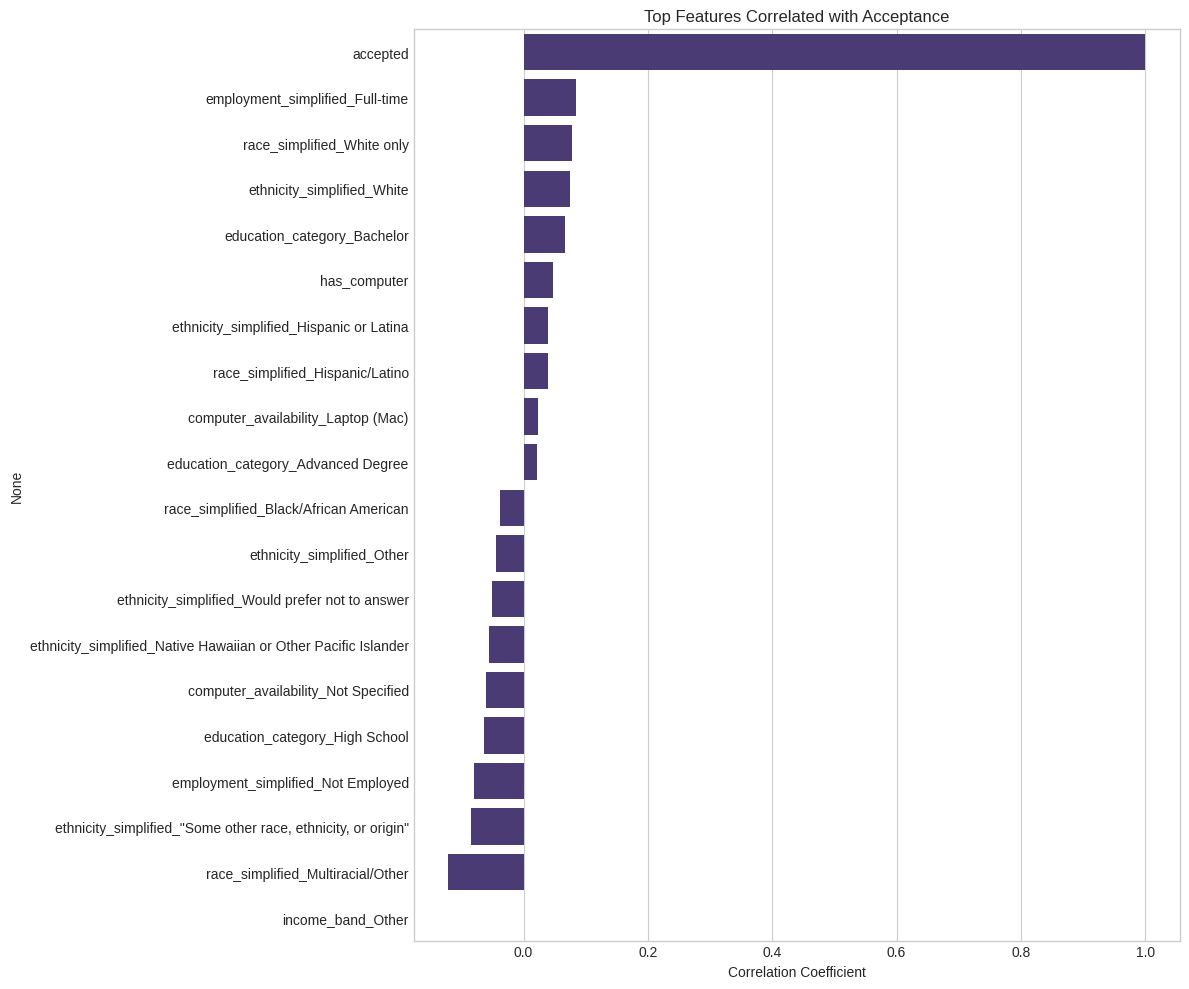

In [55]:
# Visualize top correlations
plt.figure(figsize=(12, 10))
top_correlations = pd.concat([correlations.head(10), correlations.tail(10)])  # Combine top positive and negative
sns.barplot(x=top_correlations, y=top_correlations.index)
plt.title('Top Features Correlated with Acceptance')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Preprocessing and Feature Engineering Complete!
The data is now ready for modeling in the next notebook.
Key accomplishments:
1. Cleaned missing values using appropriate strategies for each column
2. Created meaningful feature categories from raw data
3. Generated binary indicators for important factors
4. Encoded categorical variables for machine learning compatibility
5. Identified features with strongest correlation to program acceptance